In [1]:
import sys, os
import numpy as np
from tqdm import tqdm
import glob

import matplotlib.pyplot as plt
import tikzplotlib

working_path = os.path.join(os.path.dirname(os.getcwd()), '')
parent_path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), '')

sys.path.append(working_path)
sys.path.append(parent_path)

In [2]:
STLSTM_t32_d32_file = "/home/roland/Projekte/Tests/FromSurface2DepthKedro/data/05_validation/regimeB/exp2/STLSTM_t32_d32_Y_test_00.npy"
STLSTM_t32_d32 = np.load(STLSTM_t32_d32_file)

In [3]:
def getDictFromDT(dt=2):
    if dt>1:
        mae_file_path = "/home/roland/Projekte/Tests/FromSurface2DepthKedro/data/05_validation/regimeB/exp4"
        files_prefix = f"STLSTM_t_0_{dt}"
    else:
        mae_file_path = "/home/roland/Projekte/Tests/FromSurface2DepthKedro/data/05_validation/regimeB/exp3"
        files_prefix = f"STLSTM_t32_d"
        
    files = glob.glob(os.path.join(mae_file_path, files_prefix + "*"))

    MAE = dict()
    for file in files:
        basename = os.path.basename(file)
        MAE[basename] = np.load(file)[0]
        
    return MAE

def fromDict2Point(number, MAE):
    for key, values in MAE.items():
        if f"d_{number}_" in key:
            return MAE[key]
    return None

def getSeries(dt):
    MAE = getDictFromDT(dt=dt)
    series = np.array([fromDict2Point(num, MAE) for num in range(32)])
    return series

In [4]:
series = [getSeries(dt) for dt in [1,2,3]]
series[0]
#series[0] = d

array([0.01041629, 0.00997875, 0.01482477, 0.01935361, 0.01510835,
       0.02139698, 0.03210528, 0.03840386, 0.03413818, 0.0599954 ,
       0.07403217, 0.07701561, 0.07673583, 0.09977123, 0.12554169,
       0.12383302, 0.14521714, 0.15083851, 0.21250062, 0.23659462,
       0.22310288, 0.24633765, 0.30565667, 0.3338224 , 0.3047528 ,
       0.30693844, 0.35964203, 0.36561266, 0.3338294 , 0.347572  ,
       0.36310425, 0.36576208], dtype=float32)

<IPython.core.display.Javascript object>


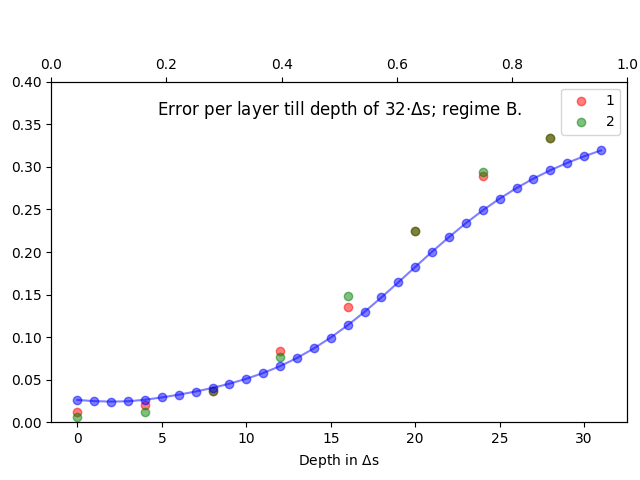

In [5]:
%matplotlib notebook

fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.subplots_adjust(left=0.08, right=0.98, top=0.83, bottom=0.12)

ax2 = ax1.twiny()

cs = ['r','g', 'y']

for i, s in enumerate(series[1:]):
    ax1.scatter(list(range(32)),s, label=i+1, c=cs[i], alpha=0.5)
    #ax1.plot(range(32),s)
    
ax1.plot(STLSTM_t32_d32, c='b', alpha=0.5)
ax1.scatter(range(32), STLSTM_t32_d32, c='b', alpha=0.5)

ax1.set_ylim([0,0.4])
ax1.set_xlabel("Depth in $\Delta$s")

ax1.legend()
#ax1.scatter(range(32), STLSTM_t32_d32)

plt.rcParams['axes.titley'] = 1.0    # y is in axes-relative coordinates.
plt.rcParams['axes.titlepad'] = -24  # pad is in points...

plt.title("Error per layer till depth of 32$\cdot\Delta$s; regime B.")
tikzplotlib.save("test.tex")

In [6]:
d = np.array([0.00520562566816807,
              0.00389883457683027,
              0.00642593670636415,
              0.00855170283466578,
              0.00988241191953421,
              0.011144045740366,
              0.0148660140112042,
              0.0189233925193548,
              0.0260560661554337,
              0.0297616608440876,
              0.0372891686856747,
              0.0447909757494926,
              0.0514606237411499,
              0.0622327029705048,
              0.0697509869933128,
              0.0821165665984154,
              0.0965808853507042,
              0.126176729798317,
              0.135096862912178,
              0.155314400792122,
              0.182847306132317,
              0.214167684316635,
              0.242563739418983,
              0.268653512001038,
              0.312957137823105,
              0.329769879579544,
              0.337288200855255,
              0.348661333322525,
              0.344058245420456,
              0.348134607076645,
              0.352096110582352,
              0.353568106889725,
])